In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import pandas as pd

In [44]:
data = pd.read_csv("fer2013.csv")

In [45]:
data.shape

(35887, 3)

In [46]:
x_data = data['pixels']
y_data = data['emotion']

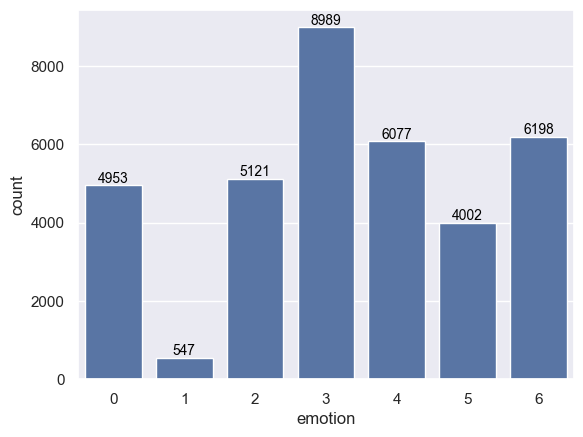

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [48]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)



(62923, 1)   (62923,)


In [53]:
y_data.value_counts()

emotion
0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: count, dtype: int64

In [54]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    25 25 25 32 32 26 19 18 19 22 20 19 18 20 20 2...
62919    246 226 41 35 36 68 102 106 111 129 122 126 12...
62920    235 235 235 235 232 246 186 23 20 17 20 19 14 ...
62921    250 247 249 248 247 246 247 247 245 241 244 24...
62922    12 20 21 14 17 19 16 9 17 11 13 12 34 26 7 11 ...
Length: 62923, dtype: object

In [55]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255

In [56]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)
print(x_train.shape," ",y_train.shape)

(56630, 2304)   (56630, 1)


In [59]:
from sklearn.neighbors import KNeighborsClassifier

# ***KNN CLASSIFIER*********

In [60]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

d:\Uni\HK3\CS114MachineLearning\CS114-Machine-Learning\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [61]:
knn.score(x_test,y_test)

0.6345145399650405

In [62]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [63]:
cm

array([[651,  12,  51,  57,  40,  37,  87],
       [  0, 895,   0,   0,   0,   0,   0],
       [ 72,  12, 592,  33,  63,  42,  66],
       [133,  37, 112, 265,  88,  60, 211],
       [105,  17,  98, 104, 395,  30, 139],
       [ 35,   5,  47,  33,  19, 707,  23],
       [ 93,  24, 101,  94,  76,  44, 488]], dtype=int64)

Text(54.75, 0.5, 'Truth')

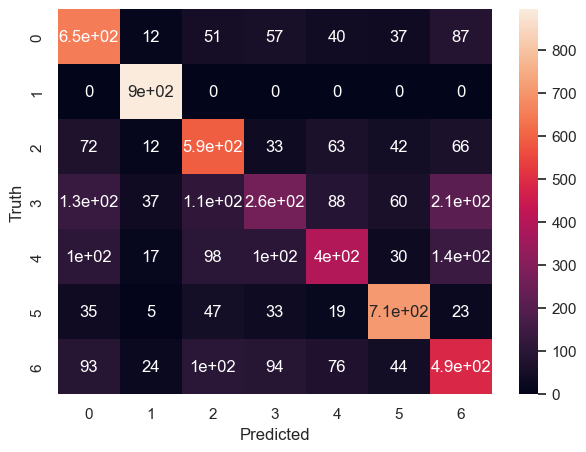

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [81]:
from joblib import dump, load
dump(knn, 'knn.joblib')

['knn.joblib']

d:\Uni\HK3\CS114MachineLearning\CS114-Machine-Learning\.venv\Lib\site-packages\gradio\components\button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
d:\Uni\HK3\CS114MachineLearning\CS114-Machine-Learning\.venv\Lib\site-packages\gradio\components\button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


# ***RANDOM FOREST***

In [65]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

d:\Uni\HK3\CS114MachineLearning\CS114-Machine-Learning\.venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [66]:
model.score(x_test,y_test)

0.8034323851898936

In [67]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [68]:
cm

array([[741,   0,  23,  84,  51,   5,  31],
       [  0, 895,   0,   0,   0,   0,   0],
       [ 14,   0, 715,  59,  36,  28,  28],
       [ 47,   0,  42, 614,  86,  31,  86],
       [ 29,   0,  47, 116, 622,  10,  64],
       [  3,   3,   9,  30,   7, 805,  12],
       [ 29,   0,  30, 114,  61,  22, 664]], dtype=int64)

Text(54.75, 0.5, 'Truth')

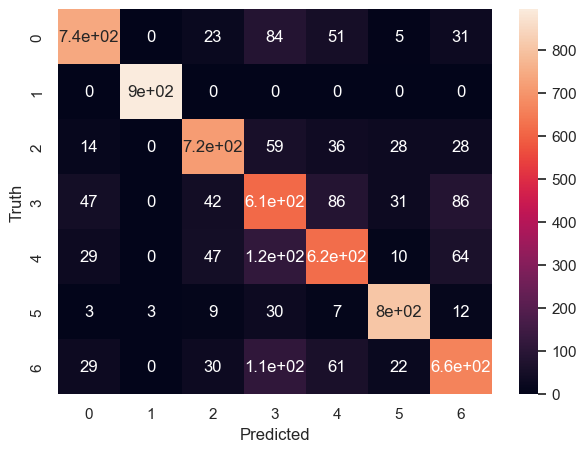

In [69]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [70]:
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

# GRADIO.APP

In [71]:
%pip install gradio


Note: you may need to restart the kernel to use updated packages.


RANDOM FOREST MODEL

In [80]:
import gradio as gr
import numpy as np
from PIL import Image
from joblib import load

# Load the trained model
model = load('random_forest_model.joblib')

emotion_labels = {
    0: "Disgust", 
    1: "Surprise", 
    2: "Angry",    
    3: "Fear",    
    4: "Sad",      
    5: "Neutral", 
    6: "Happy"     
}  


def predict_emotion(image):
    processed_image = Image.fromarray(image).convert('L').resize((48, 48))
    processed_image = np.array(processed_image).flatten().reshape(1, -1) / 255.0
    
    prediction = model.predict(processed_image)[0]  
    emotion = emotion_labels[prediction]  
    return emotion

iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.inputs.Image(shape=(48, 48), source="upload", tool="editor"),
    outputs="text",
    title="Emotion Detection",
    description="Upload an image and predict the emotion."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


KNN CLASSIFIER

In [76]:
import gradio as gr
import numpy as np
from PIL import Image
from joblib import load

# Load the trained model
model = load('knn.joblib')

emotion_labels = {
    0: "Disgust", 
    1: "Surprise", 
    2: "Angry",    
    3: "Fear",    
    4: "Sad",      
    5: "Neutral", 
    6: "Happy"     
}  


def predict_emotion(image):
    processed_image = Image.fromarray(image).convert('L').resize((48, 48))
    processed_image = np.array(processed_image).flatten().reshape(1, -1) / 255.0
    
    prediction = model.predict(processed_image)[0]  
    emotion = emotion_labels[prediction]  
    return emotion

iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.inputs.Image(shape=(48, 48), source="webcam", tool="editor"),  # The editor tool allows pasting an image
    outputs="text",
    title="Emotion Detection",
    description="Upload an image and predict the emotion."
)

iface.launch()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30976\4012898060.py:30: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(shape=(48, 48)),
C:\Users\Admin\AppData\Local\Temp\ipykernel_30976\4012898060.py:30: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(shape=(48, 48)),


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


d:\Uni\HK3\CS114MachineLearning\CS114-Machine-Learning\.venv\Lib\site-packages\gradio\components\button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
d:\Uni\HK3\CS114MachineLearning\CS114-Machine-Learning\.venv\Lib\site-packages\gradio\components\button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
d:\Uni\HK3\CS114MachineLearning\CS114-Machine-Learning\.venv\Lib\site-packages\gradio\components\button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
